In [2]:
import seaborn as sns
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
image_list = []
folder = '/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/standard/img'
for filename in os.listdir(folder):
        if filename.endswith(".tif") or filename.endswith(".tiff"):  
            img_path = os.path.join(folder, filename)
            img = tiff.imread(img_path)  #
            image_list.append(img)

In [5]:
panel = pd.read_csv('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/QC/standard/panel.csv')

In [19]:
channel_names = panel['channel']+'_'+panel['name'].tolist()

In [20]:
channel_names

0               ArAr80_ 1
1                 I127_ 2
2                Xe131_ 3
3                Xe134_ 4
4                Ba138_ 5
5              Pr141_CD38
6         Nd142_Perilipin
7          Nd143_Vimentin
8           Nd144_B4GALT1
9               Nd145_MPO
10       Nd146_CathepsinK
11            Nd148_ATP5A
12            Sm149_RUNX2
13            Nd150_HIF1A
14            Eu151_CD11b
15             Sm152_CD45
16               Eu153_CS
17            Sm154_CD11c
18             Gd155_CD36
19              Gd156_CD4
20             Gd158_CD34
21             Tb159_CD68
22             Gd160_IL32
23              Dy161_IDO
24              Dy162_CD8
25        Dy163_GranzymeK
26             Dy164_PKM2
27             Ho165_IRF4
28            Er166_GLUT1
29        Er167_GranzymeB
30             Er168_Ki67
31    Tm169_CollagenTypeI
32              Er170_CD3
33        Yb171_HistoneH3
34            Yb172_CPT1A
35             Yb173_CD98
36           Yb174_HLA-DR
37          Lu175_ST6GAL1
38          

In [9]:
panel.head(10)

,channel,name,keep,ilastik,deepcell,cellpose
0,ArAr80,1,1,1,NaN,NaN
1,I127,2,1,2,NaN,NaN
2,Xe131,3,1,3,NaN,NaN
3,Xe134,4,1,4,NaN,NaN
4,Ba138,5,1,5,NaN,NaN
5,Pr141,CD38,1,6,NaN,NaN
6,Nd142,Perilipin,1,7,NaN,NaN
7,Nd143,Vimentin,1,8,NaN,NaN
8,Nd144,B4GALT1,1,9,NaN,NaN
9,Nd145,MPO,1,10,NaN,NaN


In [6]:
def calculate_correlation_matrix(data):
    num_channels = data.shape[0]
    correlation_matrix = np.zeros((num_channels, num_channels))

    for i in range(num_channels):
        for j in range(num_channels):
            if i <= j:  # To avoid redundant calculations
                correlation = np.corrcoef(data[i, :, :].flatten(), data[j, :, :].flatten())[0, 1]
                correlation_matrix[i, j] = correlation
                correlation_matrix[j, i] = correlation  # Symmetric property
    return correlation_matrix

In [7]:
def average_correlation_matrices(images):
    num_images = len(images)
    avg_matrix = np.zeros_like(calculate_correlation_matrix(images[0]))

    for image in images:
        matrix = calculate_correlation_matrix(image)
        avg_matrix += matrix

    avg_matrix /= num_images
    return avg_matrix

In [12]:
avg_matrix = average_correlation_matrices(image_list)

In [13]:
annotations = np.where(np.abs(avg_matrix) > 0.6, np.around(avg_matrix, decimals=2), "")

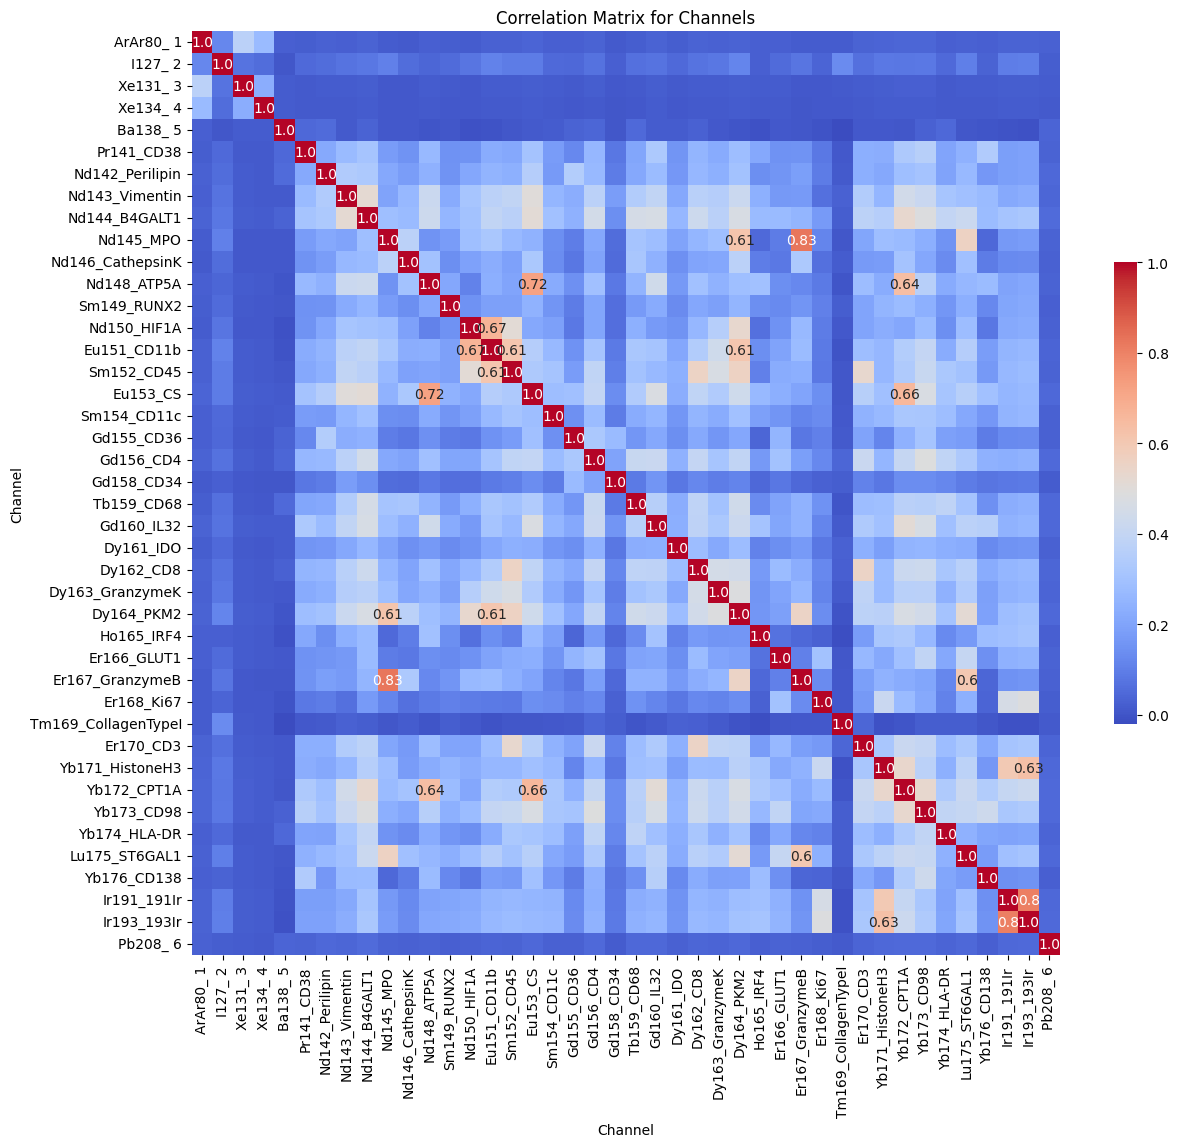

In [21]:
plt.figure(figsize=(14, 12))
sns.heatmap(avg_matrix, cbar_kws={"shrink": .5}, cmap="coolwarm", annot=annotations, fmt="",
            xticklabels=channel_names, yticklabels=channel_names)
plt.title('Correlation Matrix for Channels')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.show()